In [14]:
data1= read.csv("E0_2020_2021.csv",header = TRUE)
data2= read.csv("E0_2019_2020.csv",header = TRUE)
data3= read.csv("E0_2018_2019.csv",header = TRUE)
data1=data1[,c(4:39)]
data2=data2[,c(4:39)]
data3=data3[,c(3:38)]
dataset=rbind(data1,data2,data3)



As I did before, I combined English Premier League data of Season 2020/2021, Season 2019/2020 and Season 2018/2019.

In [15]:
homeredcards=which(dataset[,20]==1 & dataset[,21]==0)
for(i in 1:length(homeredcards)){
  if (isTRUE((dataset[homeredcards[i],22]<dataset[homeredcards[i],24]) & dataset[homeredcards[i],5]=="A")){
    df
    dataset=dataset[-homeredcards[i],]
  }
}
awayredcards=which(dataset[,21]==1&dataset[,20]==0)
for(i in 1:length(awayredcards)){
  if (isTRUE(dataset[awayredcards[i],22]>dataset[awayredcards[i],24] & dataset[awayredcards[i],5]=="H")){
    dataset=dataset[-awayredcards[i],]
  }
}

Since all bookmakers's odds are similar to each other I took odds of B365 as basis. I checked home red cards and away red cards separately. For example, I found the number of games which satisfy this condition (HR=1 & AR=0). For these games, if away team win the game because of the home red cards although  home team is more likely to win (home odds is less than away odds), then I removed these observations from the dataset. The same procedure is applied for away red cards.

In [16]:
#dataset=dataset[-c(which(dataset[,20]==1 | dataset[,21]==1)),]

Another approach can be removing all games with red cards without regarding match results and odds. But it results in data loss since it can remove unnecessary games.

In [17]:
matchid=1:length(row.names.data.frame(dataset))
dataset=cbind(matchid,dataset)

I added an additional column which is "matchid" to the dataset.

In [18]:
odd_for_B365<-dataset[,c(1:3,23:25)]
odd_for_BW<-dataset[,c(1:3,26:28)]
odd_for_IW<-dataset[,c(1:3,29:31)]
odd_for_PS<-dataset[,c(1:3,32:34)]
odd_for_WH<-dataset[,c(1:3,35:37)]


probs_B365<-1/odd_for_B365[,4:6]
probs_BW<-1/odd_for_BW[,4:6]
probs_IW<-1/odd_for_IW[,4:6]
probs_PS<-1/odd_for_PS[,4:6]
probs_WH<-1/odd_for_WH[,4:6]

denom_B365<-rowSums(probs_B365)
denom_BW<-rowSums(probs_BW)
denom_IW<-rowSums(probs_IW)
denom_PS<-rowSums(probs_PS)
denom_WH<-rowSums(probs_WH)


norm_probs_B365<-probs_B365/denom_B365
norm_probs_B365[,4] <- matchid 
names(norm_probs_B365)[4] <- "Matchid"

norm_probs_BW<-probs_BW/denom_BW
norm_probs_BW[,4] <- matchid 
names(norm_probs_BW)[4] <- "Matchid"

norm_probs_IW<-probs_IW/denom_IW
norm_probs_IW[,4] <- matchid 
names(norm_probs_IW)[4] <- "Matchid"

norm_probs_PS<-probs_PS/denom_PS
norm_probs_PS[,4] <- matchid 
names(norm_probs_PS)[4] <- "Matchid"

norm_probs_WH<-probs_WH/denom_WH
norm_probs_WH[,4] <- matchid 
names(norm_probs_WH)[4] <- "Matchid"

Probabilities and normalized probabilities for bookmakers B365, BW, IW, PS and WH are calculated using the formula in the homework sheet.

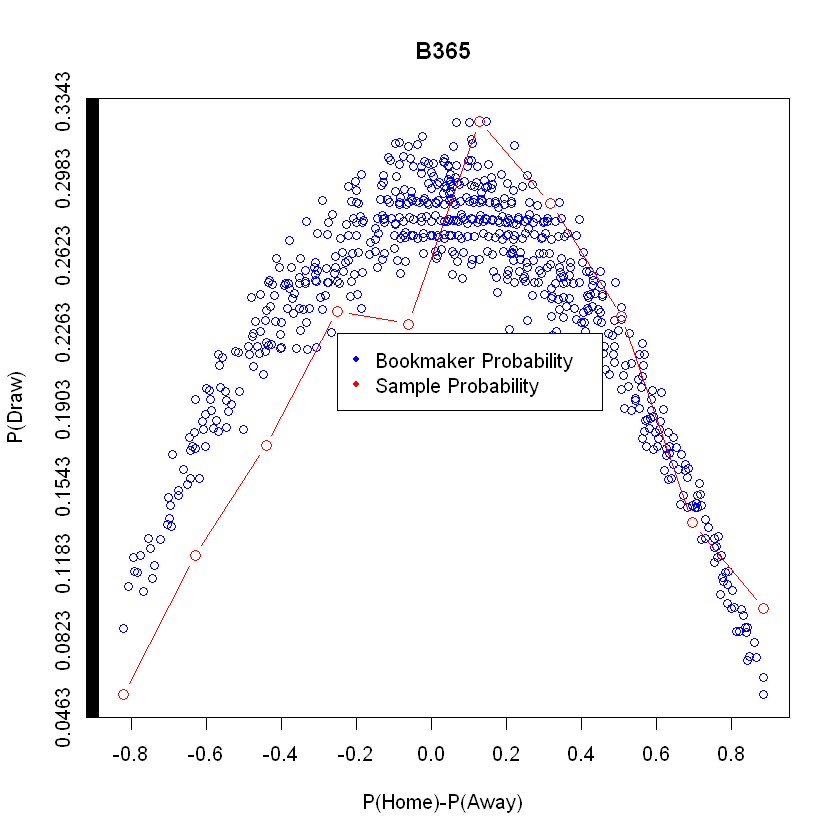

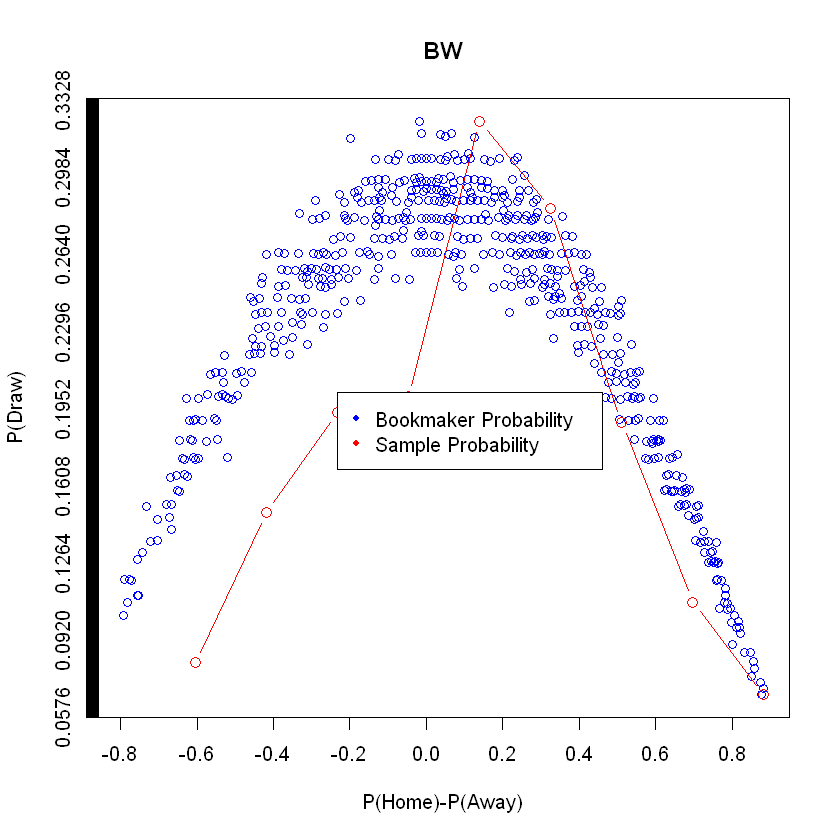

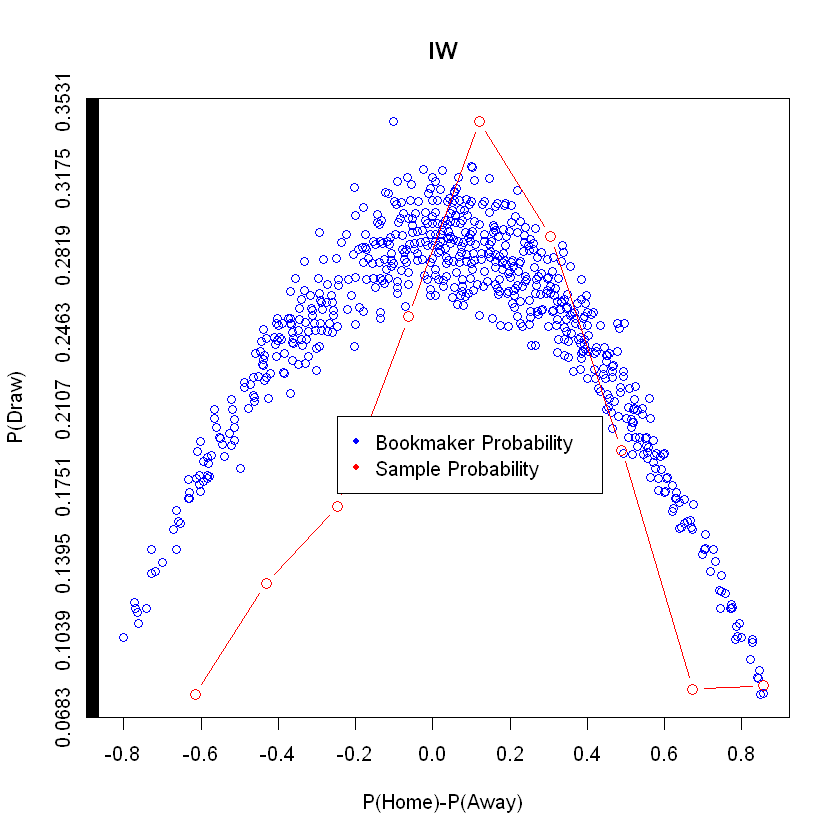

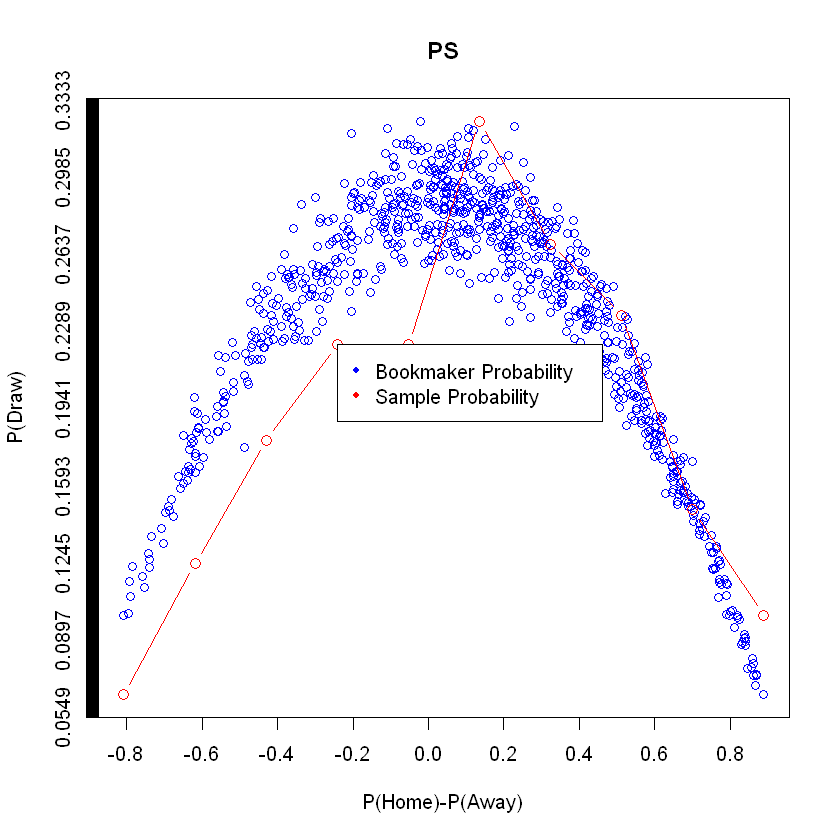

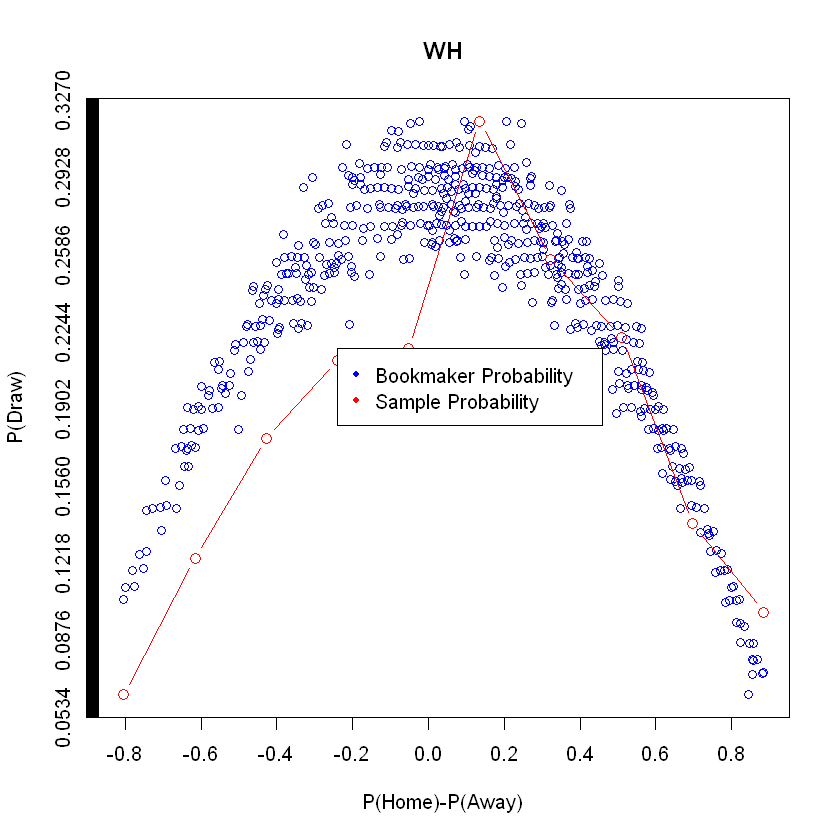

In [19]:
bookmaker_probs=list(norm_probs_B365,norm_probs_BW,norm_probs_IW,norm_probs_PS,norm_probs_WH)
bookmaker_names=list('B365','BW','IW','PS','WH')
dataGames=dataset[,c(1,6)]
names(dataGames)[1] <- "Matchid"
Bolgelerce=c()

for (i in 1:length(bookmaker_probs)){
  mergedprob<- merge(bookmaker_probs[i],dataGames, by="Matchid")
  mergedprob=mergedprob[c(1,5,2,3,4)]
  
  bin1<-mergedprob[(mergedprob[,3]-mergedprob[,5])<(-0.8)&(mergedprob[,3]-mergedprob[,5])>(-1),2]
  bin2<-mergedprob[(mergedprob[,3]-mergedprob[,5])<(-0.6)&(mergedprob[,3]-mergedprob[,5])>(-0.8),2]
  bin3<-mergedprob[(mergedprob[,3]-mergedprob[,5])<(-0.4)&(mergedprob[,3]-mergedprob[,5])>(-0.6),2]                               
  bin4<-mergedprob[(mergedprob[,3]-mergedprob[,5])<(-0.2)&(mergedprob[,3]-mergedprob[,5])>(-0.4),2]                               
  bin5<-mergedprob[(mergedprob[,3]-mergedprob[,5])<(0) &(mergedprob[,3]-mergedprob[,5])>(-0.2),2]                               
  bin6<-mergedprob[(mergedprob[,3]-mergedprob[,5])<(0.2)&(mergedprob[,3]-mergedprob[,5])>0, 2]                               
  bin7<-mergedprob[(mergedprob[,3]-mergedprob[,5])<(0.4)&(mergedprob[,3]-mergedprob[,5])>0.2,2]                               
  bin8<-mergedprob[(mergedprob[,3]-mergedprob[,5])<(0.6)&(mergedprob[,3]-mergedprob[,5])>0.4,2]
  bin9<-mergedprob[(mergedprob[,3]-mergedprob[,5])<(0.8)&(mergedprob[,3]-mergedprob[,5])>(0.6),2]                          
  bin10<-mergedprob[(mergedprob[,3]-mergedprob[,5])<1&(mergedprob[,3]-mergedprob[,5])>0.8,2]
  
  Bolgelerce[1]<-length(bin1[which(bin1=="D")])/length(bin1)
  Bolgelerce[2]<-length(bin2[which(bin2=="D")])/length(bin2)
  Bolgelerce[3]<-length(bin3[which(bin3=="D")])/length(bin3)
  Bolgelerce[4]<-length(bin4[which(bin4=="D")])/length(bin4)
  Bolgelerce[5]<-length(bin5[which(bin5=="D")])/length(bin5)
  Bolgelerce[6]<-length(bin6[which(bin6=="D")])/length(bin6)
  Bolgelerce[7]<-length(bin7[which(bin7=="D")])/length(bin7)
  Bolgelerce[8]<-length(bin8[which(bin8=="D")])/length(bin8)
  Bolgelerce[9]<-length(bin9[which(bin9=="D")])/length(bin9)
  Bolgelerce[10]<-length(bin10[which(bin10=="D")])/length(bin10)
  #dev.new()
  plot((mergedprob[,3]-mergedprob[,5]), mergedprob[,4], type="p",axes=FALSE,col='blue', xlab="P(Home)-P(Away)", ylab="P(Draw)",main = bookmaker_names[i])
  axis(side=1, at=seq(-1, 1, by=0.2))
  axis(side=2, at=seq(0,0.4 ,by=0.0001))
  par(new=TRUE)
  plot(Bolgelerce,type="b", col="red", xaxt="n", yaxt="n", ann=FALSE, cex=1.2)
  legend(x=(4),y=(0.2),legend=c("Bookmaker Probability","Sample Probability"),col=c(4,2), pch=20)
  
}

The results of Task 2 and Task 3 are paralel. Therefore, we can say that there is no any significant change in the observations. 